<a href="https://colab.research.google.com/github/SaraAlthubaiti/SAAI_SentiMo/blob/main/Sentiment_with_EmostyleGAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS of COVID 19 TWEETS
*The pandemic has really affected us in every domain, with tweets flowing like a river let us see what sentiments does it hold*
sources: https://www.kaggle.com/alankritamishra/notebooks

***IN this notebook we'll study the tweets on covid-19* and also perform Sentiment analysis so sit back to enjoy the power of BERT transformer**

On October 2018 Bert paper was invented and since then there's no looking back...

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [49]:
data = pd.read_csv("/content/finalSentimentdata2.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


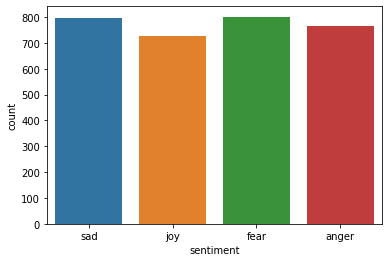

In [50]:
sns.countplot(data['sentiment'])

In [51]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [52]:
data['text'] = data['text'].apply(lambda x: clean_text(x))

In [53]:
#Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [54]:
data['text']=data['text'].apply(lambda x: remove_emoji(x))

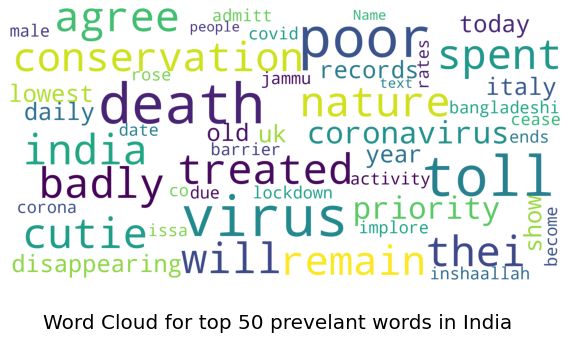

In [55]:
#Checking the maximum length of tweet 
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words in India', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [17]:
#Let's  label encode the sentiments
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()


In [18]:
lb.fit(data['sentiment'])
classes= list(lb.classes_)

In [19]:
classes

['anger', 'fear', 'joy', 'sad']

In [48]:
data['sentiment']= lb.fit_transform(data['sentiment'])

In [21]:
#So basically the encoding is anger-0.fear-1,joy-2,sad-3
data.head()


,Unnamed: 0,sentiment,text
0,3204,3,agree the poor in india are treated badly thei...
1,1431,2,if only i could have spent the with this cutie...
2,654,2,will nature conservation remain a priority in ...
3,2530,3,coronavirus disappearing in italy show this to...
4,2296,3,uk records lowest daily virus death toll since...


# Sentiment analysis (Soon ..) 
Now let's get our hands dirty with BERT transformer

# Using EmostyleGAN2

In [34]:
#Please run this first.

!nvidia-smi -L

!nvcc --version

GPU 0: Tesla K80 (UUID: GPU-d4ef98c3-bee2-de01-0939-a62558fa2998)
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [35]:
#Please run this second, this will take several minutes.

!rm -rf /content/stylegan2-ada-pytorch/

!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

!pip3 install opensimplex click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git 

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.9 MB/s eta 0:10:11tcmalloc: large alloc 1147494400 bytes == 0x556e672fa000 @  0x7f37bae79615 0x556e016f302c 0x556e017d317a 0x556e016f5e4d 0x556e017e7c0d 0x556e0176a0d8 0x556e01764c35 0x556e016f773a 0x556e01769f40 0x556e01764c35 0x556e016f773a 0x556e0176693b 0x556e017e8a56 0x556e01765fb3 0x556e017e8a56 0x556e01765fb3 0x556e017e8a56 0x556e01765fb3 0x556e016f7b99 0x556e0173ae79 0x556e016f67b2 0x556e01769e65 0x556e01764c35 0x556e016f773a 0x556e0176693b 0x556e01764c35 0x556e016f773a 0x556e01765b0e 0x556e016f765a 0x556e01765d67 0x556e01764c35
     |█████████████████               | 1055.7 MB 2.0 MB/s eta 0:07:33tcmalloc: large alloc 1434370048 bytes == 0x556e04b22000 @  0x7f37bae79615 0x556e016f302c 0x556e017d317a 0x556e016f5e4d 0x556e017e7c0d 0x556e0176a0d8 0x556e01764c35 0x556e016f773a 0x556e01769f40 0x556e01764c35 0x556e016f773a 0x556e0176693b 0x556e017e8a56 0x556e0

     |████████████████████████████████| 195 kB 5.3 MB/s 
     |████████████████████████████████| 108 kB 43.8 MB/s 
     |████████████████████████████████| 26.9 MB 93 kB/s 
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 7.01 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [36]:
import sys
sys.path.insert(0, '/content/stylegan2-ada-pytorch')
emotions_dict = {
    "amusement": 0,
    "anger": 1,
    "awe": 2,
    "contentment": 3,
    "disgust": 4,
    "excitement": 5,
    "fear": 6,
    "sadness": 7
}
import os
import re
from typing import List, Optional, Any
import click
import numpy as np
import PIL.Image
import torch
import pickle

!rm -rf sample_data/
!gdown --id '1N_6fsmF2FfWyCowvMFSsWnfOnRMxnwb4'

import dnnlib
import legacy
emostylegan_model = '/content/network-snapshot-025000.pkl'
outdir = '/content/image_generation'
seed = 10

Downloading...
From: https://drive.google.com/uc?id=1N_6fsmF2FfWyCowvMFSsWnfOnRMxnwb4
To: /content/network-snapshot-025000.pkl
295MB [00:02, 123MB/s]


Functions to be used to generate image

In [37]:
def num_range(s: str) -> List[int]:
    '''Accept either a comma separated list of numbers 'a,b,c' or a range 'a-c' and return as a list of ints.'''

    range_re = re.compile(r'^(\d+)-(\d+)$')
    m = range_re.match(s)
    if m:
        return list(range(int(m.group(1)), int(m.group(2))+1))
    vals = s.split(',')
    return [int(x) for x in vals]


In [38]:
def generate_images(
    network_pkl: str,
    seeds: Optional[List[int]],
    truncation_psi: float,
    outdir: str,
    class_idx: Optional[int],
    emotion: str,
):
  
  print('Loading networks from "%s"...' % network_pkl)
  device = torch.device('cuda')
  with dnnlib.util.open_url(network_pkl) as f:
      G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

  os.makedirs(outdir, exist_ok=True)
   # Labels.
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
        print ('warn: --class=lbl ignored when running on an unconditional network')

  # Generate images.
  for seed_idx, seed in enumerate(seeds):
      print('Generating image for seed %d (%d/%d) ...' % (seed, seed_idx, len(seeds)))
      z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
      img = G(z, label, truncation_psi=truncation_psi)
      img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
      PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'{outdir}/seed{seed:04d}_{emotion}.png')

Generate and Display the Image!

Loading networks from "/content/network-snapshot-025000.pkl"...
Generating image for seed 10 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/content/stylegan2-ada-pytorch/torch_utils/ops/bias_act.py:50: UserWarning: Failed to build CUDA kernels for bias_act. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/bias_act.py", line 48, in _init
    _plugin = custom_ops.get_plugin('bias_act_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1091, in load
    keep_intermediates=keep_intermediates)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1317, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_ext

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1091, in load
    keep_intermediates=keep_intermediates)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1317, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp

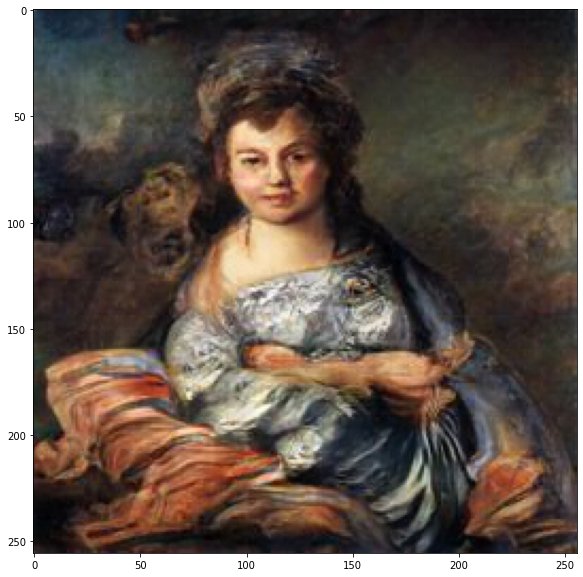

In [39]:
#----------------------------------------------------------------------------
from PIL import Image
import matplotlib.pyplot as plt

emotions = 'sadness' # Change this to any emotion from this list: amusement, anger, awe, contentment, disgust, excitement, fear, sadness
trunc = 0.8 # Change 0.8 to be any truncation you'd like.

#Note: Try to generate multiple images of multiple emotions.

generate_images(emostylegan_model, [seed], trunc, outdir, emotions_dict[emotions], emotions) # pylint: disable=no-value-for-parameter
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, 10))
ax.imshow(Image.open(os.path.join(outdir, f'seed{str(seed).zfill(4)}_{emotions}.png')))
#ax.set_title(emotions)
#----------------------------------------------------------------------------

Pregenerated Images


Loading networks from "/content/network-snapshot-025000.pkl"...
Generating image for seed 10 (0/1) ...
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1091, in load
    keep_intermediates=keep_intermediates)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1317, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp

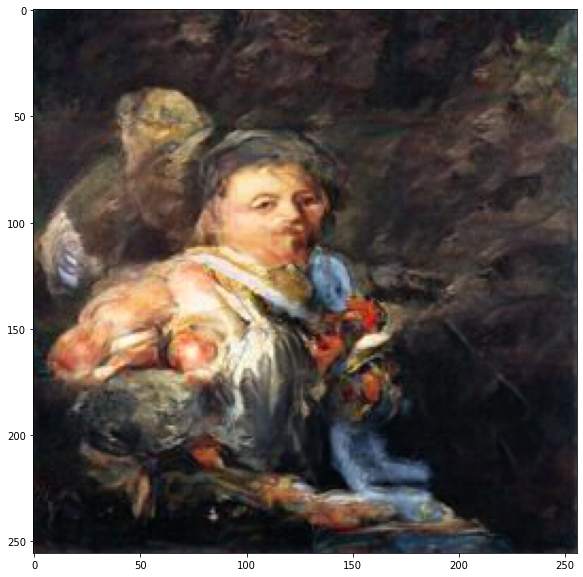

In [46]:
#----------------------------------------------------------------------------
from PIL import Image
import matplotlib.pyplot as plt

emotions = 'anger' # Change this to any emotion from this list: amusement, anger, awe, contentment, disgust, excitement, fear, sadness
trunc = 0.8 # Change 0.8 to be any truncation you'd like.

#Note: Try to generate multiple images of multiple emotions.

generate_images(emostylegan_model, [seed], trunc, outdir, emotions_dict[emotions], emotions) # pylint: disable=no-value-for-parameter
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, 10))
ax.imshow(Image.open(os.path.join(outdir, f'seed{str(seed).zfill(4)}_{emotions}.png')))
#ax.set_title(emotions)
#----------------------------------------------------------------------------

Loading networks from "/content/network-snapshot-025000.pkl"...
Generating image for seed 10 (0/1) ...
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1091, in load
    keep_intermediates=keep_intermediates)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py", line 1317, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/cpp

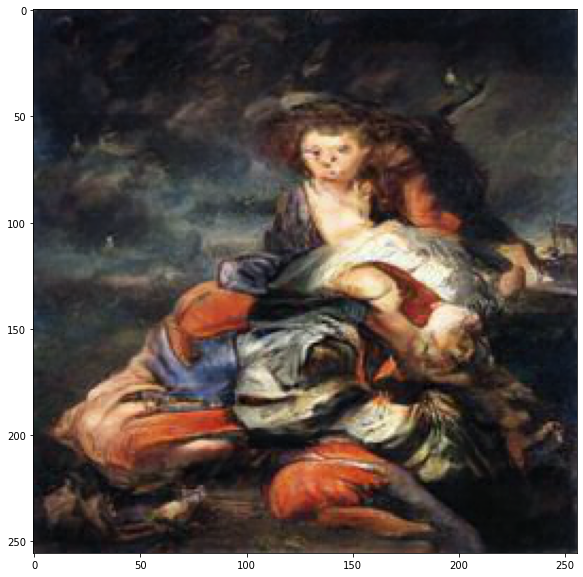

In [47]:
#----------------------------------------------------------------------------
from PIL import Image
import matplotlib.pyplot as plt

emotions = 'fear' # Change this to any emotion from this list: amusement, anger, awe, contentment, disgust, excitement, fear, sadness
trunc = 0.8 # Change 0.8 to be any truncation you'd like.

#Note: Try to generate multiple images of multiple emotions.

generate_images(emostylegan_model, [seed], trunc, outdir, emotions_dict[emotions], emotions) # pylint: disable=no-value-for-parameter
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, 10))
ax.imshow(Image.open(os.path.join(outdir, f'seed{str(seed).zfill(4)}_{emotions}.png')))
#ax.set_title(emotions)
#----------------------------------------------------------------------------

Loading networks from "/content/network-snapshot-025000.pkl"...
Generating image for seed 10 (0/1) ...


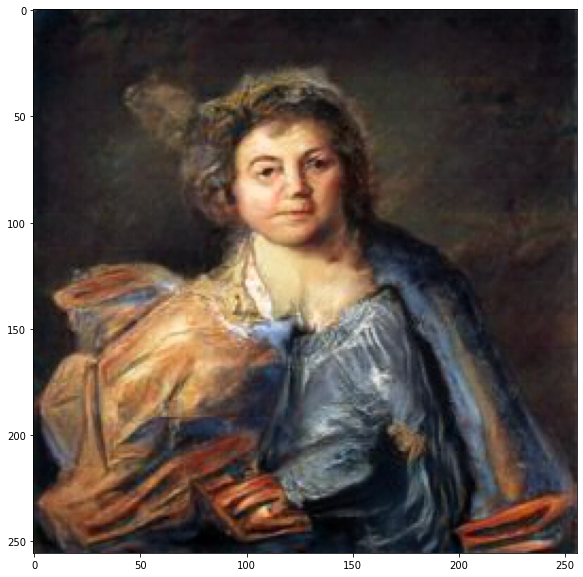

In [ ]:
#----------------------------------------------------------------------------
from PIL import Image
import matplotlib.pyplot as plt

emotions = 'amusement' # Change this to any emotion from this list: amusement, anger, awe, contentment, disgust, excitement, fear, sadness
trunc = 0.8 # Change 0.8 to be any truncation you'd like.

#Note: Try to generate multiple images of multiple emotions.

generate_images(emostylegan_model, [seed], trunc, outdir, emotions_dict[emotions], emotions) # pylint: disable=no-value-for-parameter
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, 10))
ax.imshow(Image.open(os.path.join(outdir, f'seed{str(seed).zfill(4)}_{emotions}.png')))
#ax.set_title(emotions)
#----------------------------------------------------------------------------